In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\rasto\Desktop\ML\data.csv")

In [3]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [4]:
df1 = df.drop(['date', 'waterfront','yr_built', 'yr_renovated','street','statezip','country'], axis=1)

In [5]:
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0   313000.0       3.0       1.50         1340      7912     1.5     0   
1  2384000.0       5.0       2.50         3650      9050     2.0     4   
2   342000.0       3.0       2.00         1930     11947     1.0     0   
3   420000.0       3.0       2.25         2000      8030     1.0     0   
4   550000.0       4.0       2.50         1940     10500     1.0     0   

   condition  sqft_above  sqft_basement       city  
0          3        1340              0  Shoreline  
1          5        3370            280    Seattle  
2          4        1930              0       Kent  
3          4        1000           1000   Bellevue  
4          4        1140            800    Redmond

In [6]:
df1['total_sqrft'] = df1['sqft_above'] + df1['sqft_basement'] + df1['sqft_living'] + df1['sqft_lot']

In [7]:
df1.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0   313000.0       3.0       1.50         1340      7912     1.5     0   
1  2384000.0       5.0       2.50         3650      9050     2.0     4   
2   342000.0       3.0       2.00         1930     11947     1.0     0   
3   420000.0       3.0       2.25         2000      8030     1.0     0   
4   550000.0       4.0       2.50         1940     10500     1.0     0   

   condition  sqft_above  sqft_basement       city  total_sqrft  
0          3        1340              0  Shoreline        10592  
1          5        3370            280    Seattle        16350  
2          4        1930              0       Kent        15807  
3          4        1000           1000   Bellevue        12030  
4          4        1140            800    Redmond        14380

In [8]:
df2 = df1.drop(['sqft_above', 'sqft_basement','sqft_living', 'sqft_lot'], axis=1)

In [9]:
df2.head()

price  bedrooms  bathrooms  floors  view  condition       city  \
0   313000.0       3.0       1.50     1.5     0          3  Shoreline   
1  2384000.0       5.0       2.50     2.0     4          5    Seattle   
2   342000.0       3.0       2.00     1.0     0          4       Kent   
3   420000.0       3.0       2.25     1.0     0          4   Bellevue   
4   550000.0       4.0       2.50     1.0     0          4    Redmond   

   total_sqrft  
0        10592  
1        16350  
2        15807  
3        12030  
4        14380

In [10]:
unique_cities = df2['city'].unique()

In [11]:
print(unique_cities)

['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']


In [12]:
df3 = pd.DataFrame(0,index=df2.index, columns=unique_cities)

In [13]:
df3.head()

Shoreline  Seattle  Kent  Bellevue  Redmond  Maple Valley  North Bend  \
0          0        0     0         0        0             0           0   
1          0        0     0         0        0             0           0   
2          0        0     0         0        0             0           0   
3          0        0     0         0        0             0           0   
4          0        0     0         0        0             0           0   

   Lake Forest Park  Sammamish  Auburn  ...  Vashon  Yarrow Point  SeaTac  \
0                 0          0       0  ...       0             0       0   
1                 0          0       0  ...       0             0       0   
2                 0          0       0  ...       0             0       0   
3                 0          0       0  ...       0             0       0   
4                 0          0       0  ...       0             0       0   

   Medina  Enumclaw  Snoqualmie Pass  Pacific  Beaux Arts Village  Preston  \
0       0         0                0        0                   0        0   
1       0         0                0        0                   0        0   
2       0         0                0        0                   0        0   
3       0         0                0        0                   0        0   
4       0         0                0        0                   0        0   

   Milton  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 44 columns]

In [14]:
for index,row in df2.iterrows():
    city = row['city']
    df3.at[index,city] = 1


In [15]:
df3.head()

Shoreline  Seattle  Kent  Bellevue  Redmond  Maple Valley  North Bend  \
0          1        0     0         0        0             0           0   
1          0        1     0         0        0             0           0   
2          0        0     1         0        0             0           0   
3          0        0     0         1        0             0           0   
4          0        0     0         0        1             0           0   

   Lake Forest Park  Sammamish  Auburn  ...  Vashon  Yarrow Point  SeaTac  \
0                 0          0       0  ...       0             0       0   
1                 0          0       0  ...       0             0       0   
2                 0          0       0  ...       0             0       0   
3                 0          0       0  ...       0             0       0   
4                 0          0       0  ...       0             0       0   

   Medina  Enumclaw  Snoqualmie Pass  Pacific  Beaux Arts Village  Preston  \
0       0         0                0        0                   0        0   
1       0         0                0        0                   0        0   
2       0         0                0        0                   0        0   
3       0         0                0        0                   0        0   
4       0         0                0        0                   0        0   

   Milton  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 44 columns]

In [16]:
df2.head()

price  bedrooms  bathrooms  floors  view  condition       city  \
0   313000.0       3.0       1.50     1.5     0          3  Shoreline   
1  2384000.0       5.0       2.50     2.0     4          5    Seattle   
2   342000.0       3.0       2.00     1.0     0          4       Kent   
3   420000.0       3.0       2.25     1.0     0          4   Bellevue   
4   550000.0       4.0       2.50     1.0     0          4    Redmond   

   total_sqrft  
0        10592  
1        16350  
2        15807  
3        12030  
4        14380

In [17]:
df4 = pd.concat([df2,df3], axis=1)

In [18]:
df4.head()

price  bedrooms  bathrooms  floors  view  condition       city  \
0   313000.0       3.0       1.50     1.5     0          3  Shoreline   
1  2384000.0       5.0       2.50     2.0     4          5    Seattle   
2   342000.0       3.0       2.00     1.0     0          4       Kent   
3   420000.0       3.0       2.25     1.0     0          4   Bellevue   
4   550000.0       4.0       2.50     1.0     0          4    Redmond   

   total_sqrft  Shoreline  Seattle  ...  Vashon  Yarrow Point  SeaTac  Medina  \
0        10592          1        0  ...       0             0       0       0   
1        16350          0        1  ...       0             0       0       0   
2        15807          0        0  ...       0             0       0       0   
3        12030          0        0  ...       0             0       0       0   
4        14380          0        0  ...       0             0       0       0   

   Enumclaw  Snoqualmie Pass  Pacific  Beaux Arts Village  Preston  Milton  
0         0                0        0                   0        0       0  
1         0                0        0                   0        0       0  
2         0                0        0                   0        0       0  
3         0                0        0                   0        0       0  
4         0                0        0                   0        0       0  

[5 rows x 52 columns]

In [19]:
df5 = df4.drop(['city'], axis=1)

In [20]:
df5.head()

price  bedrooms  bathrooms  floors  view  condition  total_sqrft  \
0   313000.0       3.0       1.50     1.5     0          3        10592   
1  2384000.0       5.0       2.50     2.0     4          5        16350   
2   342000.0       3.0       2.00     1.0     0          4        15807   
3   420000.0       3.0       2.25     1.0     0          4        12030   
4   550000.0       4.0       2.50     1.0     0          4        14380   

   Shoreline  Seattle  Kent  ...  Vashon  Yarrow Point  SeaTac  Medina  \
0          1        0     0  ...       0             0       0       0   
1          0        1     0  ...       0             0       0       0   
2          0        0     1  ...       0             0       0       0   
3          0        0     0  ...       0             0       0       0   
4          0        0     0  ...       0             0       0       0   

   Enumclaw  Snoqualmie Pass  Pacific  Beaux Arts Village  Preston  Milton  
0         0                0        0                   0        0       0  
1         0                0        0                   0        0       0  
2         0                0        0                   0        0       0  
3         0                0        0                   0        0       0  
4         0                0        0                   0        0       0  

[5 rows x 51 columns]

In [21]:
train_y = df5['price'].values

In [22]:
print(train_y)

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


In [23]:
inp_data = df5.drop(['price'],axis=1)

In [24]:
inp_data.head()

bedrooms  bathrooms  floors  view  condition  total_sqrft  Shoreline  \
0       3.0       1.50     1.5     0          3        10592          1   
1       5.0       2.50     2.0     4          5        16350          0   
2       3.0       2.00     1.0     0          4        15807          0   
3       3.0       2.25     1.0     0          4        12030          0   
4       4.0       2.50     1.0     0          4        14380          0   

   Seattle  Kent  Bellevue  ...  Vashon  Yarrow Point  SeaTac  Medina  \
0        0     0         0  ...       0             0       0       0   
1        1     0         0  ...       0             0       0       0   
2        0     1         0  ...       0             0       0       0   
3        0     0         1  ...       0             0       0       0   
4        0     0         0  ...       0             0       0       0   

   Enumclaw  Snoqualmie Pass  Pacific  Beaux Arts Village  Preston  Milton  
0         0                0        0                   0        0       0  
1         0                0        0                   0        0       0  
2         0                0        0                   0        0       0  
3         0                0        0                   0        0       0  
4         0                0        0                   0        0       0  

[5 rows x 50 columns]

In [25]:
row_arrays = []

# Iterate over columns (excluding 'price')
for index,row in inp_data.iterrows():
        row_val = row.values
        row_arrays.append(row_val)

In [26]:
print(row_arrays)

[array([3.0000e+00, 1.5000e+00, 1.5000e+00, 0.0000e+00, 3.0000e+00,
       1.0592e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]), array([5.000e+00, 2.500e+00, 2.000e+00, 4.000e+00, 5.000e+00, 1.635e+04,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e

In [27]:
def custom_convert(value):
    if value.is_integer():
        return value
    else:
        return value

# Convert each array to regular integers or keep them as floats based on the custom conversion function
for i in range(len(row_arrays)):
    for j in range(len(row_arrays[i])):
        row_arrays[i][j] = custom_convert(row_arrays[i][j])

In [28]:
print(row_arrays)

[array([3.0000e+00, 1.5000e+00, 1.5000e+00, 0.0000e+00, 3.0000e+00,
       1.0592e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]), array([5.000e+00, 2.500e+00, 2.000e+00, 4.000e+00, 5.000e+00, 1.635e+04,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e

In [29]:
col = df5.shape[1]
print(col)

51


In [30]:
w = np.zeros(50)
for i in range(50):
    w[i] = 1

    

In [31]:
print(w)
print(w.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
(50,)


In [32]:
b = 50

In [33]:
print(train_y)
print(len(train_y))

[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]
4600


In [34]:
for i in range(len(train_y)):
    train_y[i] = train_y[i]/1000
    

In [35]:
print(train_y)

[ 313.         2384.          342.         ...  416.90416667  203.4
  220.6       ]


In [36]:
b = 50

In [37]:
print(b)
print(w)

50
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [38]:
print(len(row_arrays[1]))
print(len(w))

50
50


In [39]:
def predict_cost_house(inp_x, w,b):
    cost =0
    for i in range(len(inp_x)):
        cost += inp_x[i]*w[i]

    cost += b

    return cost      

In [40]:
def mean_squared_cost(x,y,w,b):
    cost = 0
    m = len(x)
    for i in range(m):
        cost += (y[i] - predict_cost_house(x[i],w,b))**2

    cost = cost/(2*m)

    return cost    


In [41]:
learning_rate = 0.05


In [42]:
def gradient_descent(x,y,alpha,iter,w,b):
    n = len(x)
    cost_history = []

    for i in range(iter):
        pred = np.dot(x,w)+b
        error = pred - y
        w_desc = np.dot(x.T, error)
        gradient_w = (1/n)*w_desc
        gradient_b = (1/n)*error.sum()

        w = w- (alpha*gradient_w)
        b = b - (alpha*gradient_b)

        cost = mean_squared_cost(x,y,w,b)
        cost_history.append(cost)

    print(w)
    print(b)
    
    return w,b,cost_history    
        


In [43]:
import matplotlib.pyplot as plt

In [44]:
train_x = np.array(row_arrays)
train_y = np.array(train_y)
#w_new, b_new, cost_hist = gradient_descent(train_x,train_y,0.01,1000,w,b)
# print(w)
# print(b)

In [45]:

high = 0.0
low = 100000.0
mean_sqf = 0.0

# Find the highest and lowest square foot values
for i in range(len(train_x)):
    mean_sqf += train_x[i][5]
    if train_x[i][5] > high:
        high = float(train_x[i][5])

    if train_x[i][5] < low:
        low = float(train_x[i][5])    

mean_sqf /= float(len(train_x))
print(mean_sqf)

print(float(train_x[1888][5] - mean_sqf) / float(high - low))

print("Mean sqf:", mean_sqf)
print("High:", high)
print("Low:", low)

new_val = []
# # Scale the square foot values
for i in range(len(train_x)):
     num = float(train_x[i][5] - mean_sqf) / float(high - low)
     new_val.append(num)
    # train_x[i][5] = num
     if i==1:
         print(num)
        #  train_x[i][5] = float(num)

print(train_x[1][5])     



19131.21
-0.010935760161376335
Mean sqf: 19131.21
High: 1080238.0
Low: 2013.0
-0.00257943379164831
16350.0


In [46]:
# for i in range(len(train_x)):
#     print(train_x[i][5])

In [47]:
print(train_x[0][5])

10592.0


In [48]:
print(new_val)

[-0.007919692086531104, -0.00257943379164831, -0.0030830392543300324, -0.006586018688121681, -0.004406510700456769, -0.010193799995362749, -0.012864856593011662, 0.020549319483410235, 0.06877487537387837, -0.009173604767094065, -0.00778242945581859, -0.008617134642583875, 0.00039026177282107247, -0.00975326114679218, -0.003553256509541143, -0.006502548169445152, -0.008617134642583875, -0.005268111943240047, -0.00976902780031997, -0.006023056412158871, -0.003777699459760253, -0.006892077256602285, -0.013039217232024855, -0.001307899557142525, -0.008858271696538291, -0.0038185072688910007, -0.006603640242064503, -0.003228648936910199, 0.050107157596976516, -0.008515115119757007, -0.006780783231700247, -0.009335908553409537, -0.009730074891604256, -0.004714424169352407, 0.028762818521180646, 0.019012534489554592, -0.01176119084606645, 0.0042057919265459445, -0.001958042152611931, -0.007235233833383569, 0.00022610308609056633, -0.006998734030466739, -0.010440501750562266, -0.01179365160332

In [49]:
train_x_new = []

for i in range(len(new_val)):
    arr=  []
    for j in range(len(train_x[i])):
        if j == 5:
            arr.append(new_val[i])
        else:
            arr.append(train_x[i][j]) 

    train_x_new.append(arr)          

In [50]:
print(train_x_new)

[[3.0, 1.5, 1.5, 0.0, 3.0, -0.007919692086531104, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 2.5, 2.0, 4.0, 5.0, -0.00257943379164831, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 2.0, 1.0, 0.0, 4.0, -0.0030830392543300324, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 2.25, 1.0, 0.0, 4.0, -0.006586018688121681, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [51]:
print(len(train_x_new))

4600


In [52]:
print(len(train_x_new[0]))

50


In [53]:
print(train_x_new)

[[3.0, 1.5, 1.5, 0.0, 3.0, -0.007919692086531104, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 2.5, 2.0, 4.0, 5.0, -0.00257943379164831, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 2.0, 1.0, 0.0, 4.0, -0.0030830392543300324, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 2.25, 1.0, 0.0, 4.0, -0.006586018688121681, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [54]:
print(train_y)

[ 313.         2384.          342.         ...  416.90416667  203.4
  220.6       ]


In [55]:
print(w)
print(b)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
50


In [56]:
w = np.ones(50)

In [57]:
print(w)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [58]:
print(len(w))

50


In [59]:
train_X = np.array(train_x_new)

In [60]:
print(train_X)

[[3.  1.5 1.5 ... 0.  0.  0. ]
 [5.  2.5 2.  ... 0.  0.  0. ]
 [3.  2.  1.  ... 0.  0.  0. ]
 ...
 [3.  2.5 2.  ... 0.  0.  0. ]
 [4.  2.  1.  ... 0.  0.  0. ]
 [3.  2.5 2.  ... 0.  0.  0. ]]


In [61]:
print(train_X[0][5])

-0.007919692086531104


In [62]:
w_new, b_new, cost_hist = gradient_descent(train_X,train_y,0.001,1000,w,b)

[ 4.90525842e+01  8.93917957e+01  3.19288603e+01  6.51236717e+01
  2.16030162e+01  1.90578944e+00 -1.44149575e+00  1.67688087e+01
 -2.86067898e+00  1.64914730e+01  7.07862024e+00 -3.41669765e+00
 -4.83605324e-01  1.08673441e-01  4.89740371e+00 -7.73793344e+00
 -1.77608775e+00  5.02248152e-01 -6.82128771e+00  4.72539880e+00
  1.76622989e+00  2.33458315e+00  7.98836447e-01  1.26564671e+00
 -9.02588493e+00  9.51850652e-01  3.31615207e-01 -1.49369813e-01
 -1.72373272e+00 -1.08087257e+00  9.63659457e-01 -3.90541110e-01
  1.54908169e+00  9.58440414e+00  7.12050484e-01  9.87152615e-01
  2.65766216e+00  6.87488531e-01  8.48801754e-01 -1.33540286e-02
  6.15494405e-01  1.53397540e+00 -5.27968385e-01  4.34304330e+00
 -3.51610065e-01  9.94657273e-01  6.38621613e-01  1.05521638e+00
  1.00796480e+00  9.10464099e-01]
55.31000597721519


In [63]:
print(w_new)
print(b_new)

[ 4.90525842e+01  8.93917957e+01  3.19288603e+01  6.51236717e+01
  2.16030162e+01  1.90578944e+00 -1.44149575e+00  1.67688087e+01
 -2.86067898e+00  1.64914730e+01  7.07862024e+00 -3.41669765e+00
 -4.83605324e-01  1.08673441e-01  4.89740371e+00 -7.73793344e+00
 -1.77608775e+00  5.02248152e-01 -6.82128771e+00  4.72539880e+00
  1.76622989e+00  2.33458315e+00  7.98836447e-01  1.26564671e+00
 -9.02588493e+00  9.51850652e-01  3.31615207e-01 -1.49369813e-01
 -1.72373272e+00 -1.08087257e+00  9.63659457e-01 -3.90541110e-01
  1.54908169e+00  9.58440414e+00  7.12050484e-01  9.87152615e-01
  2.65766216e+00  6.87488531e-01  8.48801754e-01 -1.33540286e-02
  6.15494405e-01  1.53397540e+00 -5.27968385e-01  4.34304330e+00
 -3.51610065e-01  9.94657273e-01  6.38621613e-01  1.05521638e+00
  1.00796480e+00  9.10464099e-01]
55.31000597721519


In [64]:
def make_reasonable_array(city):
    arr = []
    for i in range(len(unique_cities)):
        if unique_cities[i] == city:
            arr.append(1)
        else:
            arr.append(0)
            

    return arr        

In [65]:
print(len(make_reasonable_array('Shoreline')))
print(len(unique_cities))

44
44


In [66]:
print(inp_data)

      bedrooms  bathrooms  floors  view  condition  total_sqrft  Shoreline  \
0          3.0       1.50     1.5     0          3        10592          1   
1          5.0       2.50     2.0     4          5        16350          0   
2          3.0       2.00     1.0     0          4        15807          0   
3          3.0       2.25     1.0     0          4        12030          0   
4          4.0       2.50     1.0     0          4        14380          0   
...        ...        ...     ...   ...        ...          ...        ...   
4595       3.0       1.75     1.0     0          4         9380          0   
4596       3.0       2.50     2.0     0          3        10493          0   
4597       3.0       2.50     2.0     0          3        13034          0   
4598       4.0       2.00     1.0     0          3        10810          0   
4599       3.0       2.50     2.0     0          4        11082          0   

      Seattle  Kent  Bellevue  ...  Vashon  Yarrow Point  SeaTa

In [67]:
def predict_price(x):
    price = np.dot(x,w) + b
    print("Predicted price of house : $", price*1000)

In [68]:
be = 0
ba = 0
fl = 0
v = 0
con = 0
sq = 0
sq_min = 10
for i in range(len(train_X)):
    if train_X[i][0] > be:
        be = train_X[i][0]
    if train_X[i][1] > ba:
        ba = train_X[i][0]
    if train_X[i][2] > fl:
        fl = train_X[i][0]
    if train_X[i][3] > v:
        v = train_X[i][0]
    if train_X[i][4] > con:
        con = train_X[i][0]
    if train_X[i][5] > sq:
        sq = train_X[i][0]  
    if train_X[i][5] < sq_min:
        sq_min = train_X[i][5]

print(be,ba,fl,v,con,sq, sq_min)

print(train_X[4][5])                       

9.0 7.0 3.0 5.0 5.0 4.0 -0.015876287416819308
-0.004406510700456769


In [69]:
def ask_user_input():
    bed = int(input("Please enter number of bedrooms <= 9"))
    bath = int(input("Please enter number of Bathrooms <= 7"))
    floor = int(input("Please enter number of floors <= 3"))
    view = int(input("Please rate the viewon a scale of 0 - 5"))
    condition = int(input("Please rate the condition on a scale of 1-5"))
    sqft = int(input("Please enter square-feet"))
    nsqft = float(sqft - mean_sqf) / float(high - low)
    print('Cities : ', unique_cities)
    city = input("Please enter city out of given above")
    city_arr = make_reasonable_array(city)
    feature_arr = [bed, bath, floor, view, condition, nsqft]
    inp = []
    for feature in feature_arr:
        inp.append(feature)
    for item in city_arr:
        inp.append(item)
    print(inp)
    print(len(inp))
    predict_price(inp)
    
    

In [70]:
ask_user_input()

Cities :  ['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']
[7, 3, 3, 5, 5, 0.01935476361612836, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
50
Predicted price of house : $ 74019.35476361612


In [71]:
inp_data

bedrooms  bathrooms  floors  view  condition  total_sqrft  Shoreline  \
0          3.0       1.50     1.5     0          3        10592          1   
1          5.0       2.50     2.0     4          5        16350          0   
2          3.0       2.00     1.0     0          4        15807          0   
3          3.0       2.25     1.0     0          4        12030          0   
4          4.0       2.50     1.0     0          4        14380          0   
...        ...        ...     ...   ...        ...          ...        ...   
4595       3.0       1.75     1.0     0          4         9380          0   
4596       3.0       2.50     2.0     0          3        10493          0   
4597       3.0       2.50     2.0     0          3        13034          0   
4598       4.0       2.00     1.0     0          3        10810          0   
4599       3.0       2.50     2.0     0          4        11082          0   

      Seattle  Kent  Bellevue  ...  Vashon  Yarrow Point  SeaTac  Medina  \
0           0     0         0  ...       0             0       0       0   
1           1     0         0  ...       0             0       0       0   
2           0     1         0  ...       0             0       0       0   
3           0     0         1  ...       0             0       0       0   
4           0     0         0  ...       0             0       0       0   
...       ...   ...       ...  ...     ...           ...     ...     ...   
4595        1     0         0  ...       0             0       0       0   
4596        0     0         1  ...       0             0       0       0   
4597        0     0         0  ...       0             0       0       0   
4598        1     0         0  ...       0             0       0       0   
4599        0     0         0  ...       0             0       0       0   

      Enumclaw  Snoqualmie Pass  Pacific  Beaux Arts Village  Preston  Milton  
0            0                0        0                   0        0       0  
1            0                0        0                   0        0       0  
2            0                0        0                   0        0       0  
3            0                0        0                   0        0       0  
4            0                0        0                   0        0       0  
...        ...              ...      ...                 ...      ...     ...  
4595         0                0        0                   0        0       0  
4596         0                0        0                   0        0       0  
4597         0                0        0                   0        0       0  
4598         0                0        0                   0        0       0  
4599         0                0        0                   0        0       0  

[4600 rows x 50 columns]

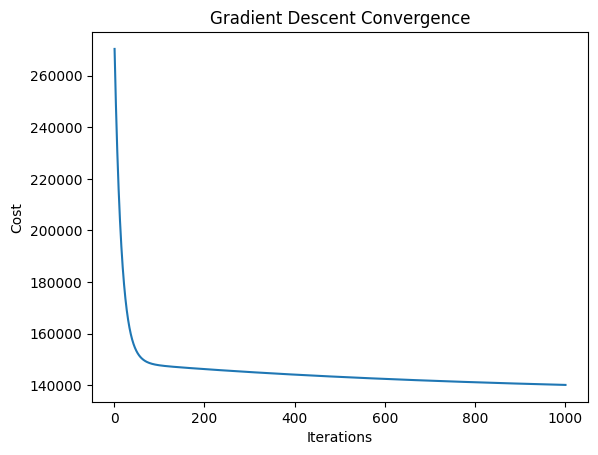

In [73]:
import matplotlib.pyplot as plt

plt.plot(range(1, 1000 + 1), cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.show()